# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 7866.0 seconds with an integrated measurement of 0.065902847.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil.o
The flux:
 5.0000e-09 5.9658e-10 3.3105e-09 7.3413e-09 5.5448e-09 3.8396e-09 2.9108e-09 
 2.1463e-09 1.7558e-09 1.1270e-09 7.0451e-10 7.0414e-10 8.1038e-10 1.0522e-09 
 1.1427e-09 1.0875e-09 1.8313e-09 1.2878e-09 8.2658e-10 1.2799e-09 1.8487e-09 
 9.3718e-10 1.8186e-09 1.1280e-09 4.8416e-10 4.9511e-10 5.2916e-10 1.0874e-09 
 1.1649e-09 7.8652e-10 9.0167e-10 1.9005e-09 1.0445e-09 6.0306e-10 5.0935e-10 
 1.3961e-09 9.3846e-10 1.1765e-09 2.1001e-09 1.1833e-09 1.5757e-09 2.6332e-09 
 1.9251e-09 3.9669e-09 5.3677e-09 3.6788e-09 3.0058e-09 8.9772e-09 9.8661e-09 
 1.8694e-08 2.3001e-08 2.4866e-08 2.6623e-08 3.3887e-08 3.8048e-08 4.4267e-08 
 5.1840e-08 3.7116e-08 5.1845e-08 6.1626e-08 8.7745e-08 8.6490e-08 8.9304e-08 
 9.2638e-08 1.0444e-07 1.0667e-07 1.1373e-07 1.0654e-07 1.4164e-07 1.4561e-07 
 3.8050e-07 3.8831e-07 3.7847e-07 3.7171e-07 3.7737e-07 5.77

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd
from DataAnalysis.DataManipulation import bin_integration, bin_differentiation

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)

df['adjFlux'] = bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low')
df['adjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low', True)
df['unadjFlux'] = bin_integration(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low')
df['unadjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low', True)

df['adjLethargyStd'] = df['adjStd'] * df['adjLethargy'] / 100
df['unadjLethargyStd'] = df['unadjStd'] * df['adjLethargy'] / 100
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert,adjLethargy,unadjLethargy,adjLethargyStd,unadjLethargyStd
1,1.000000e-10,52.416000,20.300400,2.582,9.125626,20.300400,0.174,326620.00,0.56,22.763980,8.816352,3.963209,22.763980
2,1.000000e-09,4.906440,2.422080,2.026,0.206070,0.628045,0.162,326560.00,0.56,2.130840,1.051896,0.089495,0.552527
3,1.000000e-08,29.142100,13.440700,2.168,1.156941,2.439487,0.219,326560.00,0.56,34.988331,16.137055,1.389037,6.350382
4,2.300000e-08,58.800600,29.805300,1.973,1.940420,3.257719,0.302,326530.00,0.56,75.722370,38.382737,2.498838,8.276455
5,5.000000e-08,66.336400,22.511840,2.947,4.444539,3.912558,0.385,326470.00,0.56,158.430291,53.764711,10.614829,27.535184
6,7.600000e-08,39.963300,15.588690,2.563,2.205974,1.844142,0.467,326410.00,0.56,96.483382,37.635769,5.325883,11.413984
7,1.150000e-07,38.362500,11.817850,3.246,3.141889,1.790404,0.541,326370.00,0.56,98.147369,30.235018,8.038270,14.869326
8,1.700000e-07,55.762550,8.714200,6.399,11.487085,2.949757,0.608,326330.00,0.56,137.527370,21.491862,28.330638,46.553015
9,2.550000e-07,52.912500,7.128500,7.423,13.794289,2.770135,0.671,326270.00,0.56,132.643464,17.870048,34.580151,51.545250
10,3.800000e-07,25.166800,4.575550,5.500,4.980510,1.244092,0.728,326220.00,0.56,68.064915,12.374812,13.470047,18.506850


Convert to Histograms and plot the adjusted and unadjusted flux.

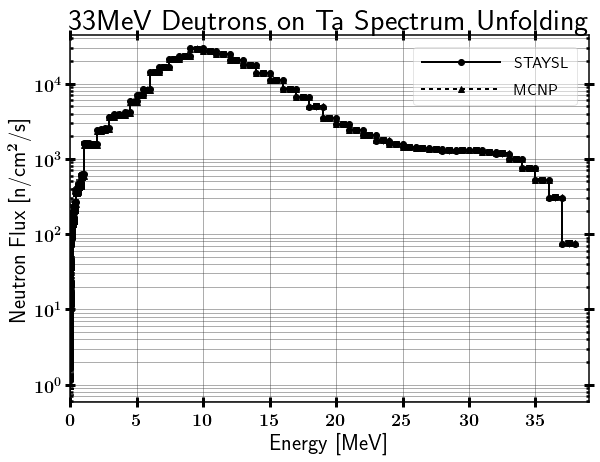

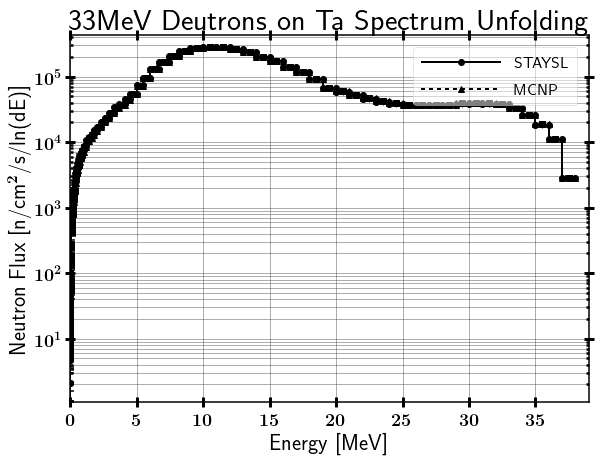

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/'

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjHisto = Histogram()
unadjHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjHisto.plot(unadjHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold')

adjLethargyHisto = Histogram()
adjLethargyHisto.build_histo(df['lowE'].tolist(), df['adjLethargy'].tolist(), uncert=df['adjLethargyStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjLethargyHisto = Histogram()
unadjLethargyHisto.build_histo(df['lowE'].tolist(), df['unadjLethargy'].tolist(), uncert=df['unadjLethargyStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Lethargic')

#ratioHisto = Histogram()
#ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
#ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP',
#              xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

Create MCNP Histograms

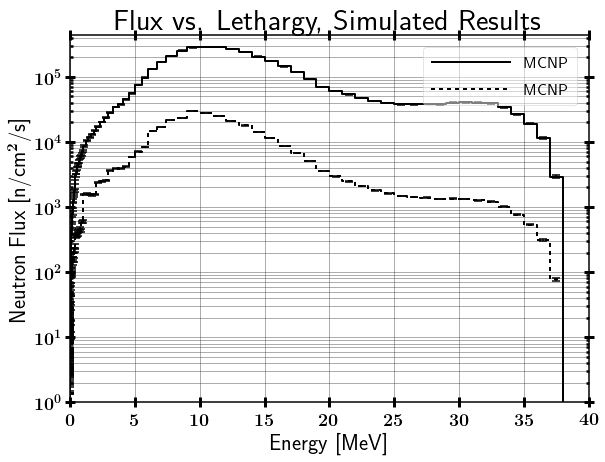

In [6]:
mcnpHisto = Histogram()
normFactor = 4.13E+9  # From Meulders based calcs which ignore flux below 3 MeV.

tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')

tallyFrame['normLethargy'] =  bin_differentiation(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 'up', True)
tallyFrame['normLethargyUncert'] = tallyFrame['uncertainty'] * tallyFrame['normLethargy']
mcnpLethargyHisto = Histogram()
mcnpLethargyHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normLethargy'].tolist(), 
                       uncert=tallyFrame['normLethargyUncert'].tolist(), edgeLoc='up', name='MCNP')
mcnpLethargyHisto.plot(mcnpHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='Flux vs. Lethargy, Simulated Results',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
              savePath=outpath+'33MeVTa_MCNP')

### Iterative Solution #1:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does not update the uncertainty until $\chi^2$ converged.

In [7]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.05))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)
# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.05
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 45.21303, Std Norm = 7.65280896077
Chi^2 = 8.56583
Chi^2 = 7.34832
Chi^2 = 6.91615
Chi^2 = 6.58247
Chi^2 = 6.27878
Chi^2 = 5.99768
Chi^2 = 5.73389
Chi^2 = 5.48469
Chi^2 = 5.24827
Chi^2 = 5.02368
Chi^2 = 4.81037
Chi^2 = 4.60738
Chi^2 = 4.4143
Chi^2 = 4.22962
Chi^2 = 4.05482
Chi^2 = 3.88809
Chi^2 = 3.72986
Chi^2 = 3.57899
Chi^2 = 3.43568
Chi^2 = 3.29936
Chi^2 = 3.16921
Chi^2 = 3.04554
Chi^2 = 2.92781
Chi^2 = 2.81571
Chi^2 = 2.70867
Chi^2 = 2.60715
Chi^2 = 2.51022
Chi^2 = 2.41779
Chi^2 = 2.32907
Chi^2 = 2.2456
Chi^2 = 2.16557
Chi

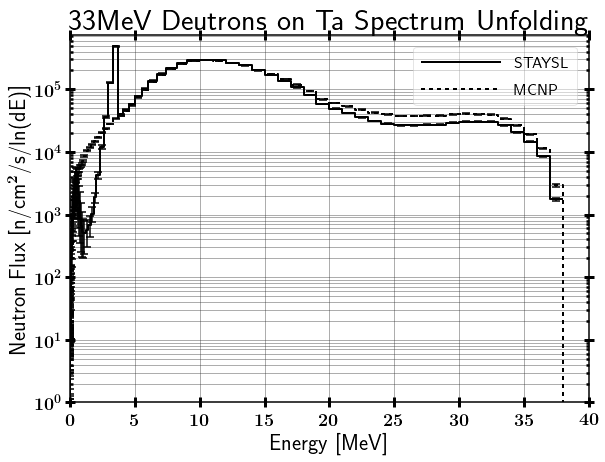

In [8]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(mcnpLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
                        title='33MeV Deutrons on Ta Spectrum Unfolding',
                        xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                        savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [15]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.005))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.005
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 2.9782, Std Norm = 1.56035528006
Chi^2 = 2.96798
Chi^2 = 2.95793
Chi^2 = 2.94788
Chi^2 = 2.93804
Chi^2 = 2.92837
Chi^2 = 2.91847
Chi^2 = 2.9085
Chi^2 = 2.8987
Chi^2 = 2.88876
Chi^2 = 2.87905
Chi^2 = 2.8696
Chi^2 = 2.85995
Chi^2 = 2.85012
Chi^2 = 2.84057
Chi^2 = 2.83107
Chi^2 = 2.82157
Chi^2 = 2.81202
Chi^2 = 2.80244
Chi^2 = 2.79298
Chi^2 = 2.78372
Chi^2 = 2.77445
Chi^2 = 2.76514
Chi^2 = 2.75599
Chi^2 = 2.74673
Chi^2 = 2.73768
Chi^2 = 2.72909
Chi^2 = 2.72039
Chi^2 = 2.71122
Chi^2 = 2.70226
Chi^2 = 2.69371
Chi^2 = 2.68479
Chi^2 

MCNP Beam Flux = 3.309570e+05 n/cm^2/s
STAYSL Beam Flux = 3.967166e+05 n/cm^2/s
Sim to Experimental Chi^2 = 1535098.02768


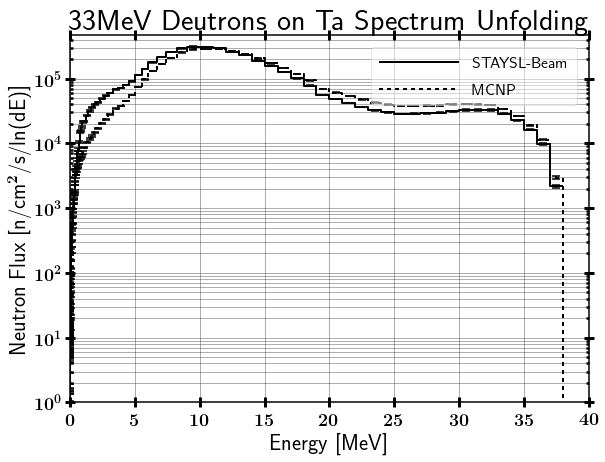

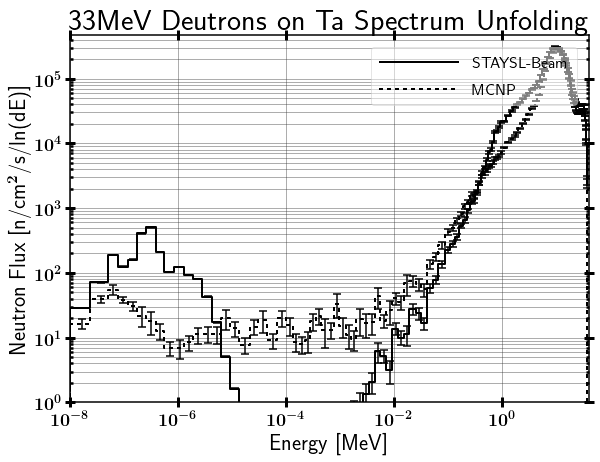

In [16]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL-Beam')

print "MCNP Beam Flux = {:2e} n/cm^2/s".format(sum(tallyFrame['normTally']))
print "STAYSL Beam Flux = {:2e} n/cm^2/s".format(sum(iterSoln[iter]._df['adjFlux']))

from DataAnalysis.Stats import red_chisq
print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterAdjHisto[iter].midPtData, 
                                                         mcnpHisto.midPtData[:len(iterAdjHisto[iter].midPtData)], 
                                                         standDev=iterAdjHisto[iter].sigma , freeParams=2))

iterAdjHisto[iter].plot(mcnpLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))


iterAdjHisto[iter].plot(mcnpLethargyHisto, xMin=1E-8, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}_log'.format(iter))

#### Create MCNP Input Source

Using this unfold, create the MCNP input source spectrum.

In [11]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())

print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

In [12]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())

print "Neutron Intensity: {:.2e}".format(sum(iterSoln[iter]._df['adjFlux']))

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

### Iterative Solution #3:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [13]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration3/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=1))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration3/
$\chi^2$ Convergence: 1
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam - Copy/STAYSL_PNNL/Iteration3/stayslin.out
Chi^2 = 338.11911, Std Norm = 9.33576051642
Chi^2 = 2.64911
Chi^2 = 3.24399
Std Norm = 7.44533556262, 7.7983492702
Std Norm = 7.06605809699, 7.44533556262
Std Norm = 6.81514207702, 7.06605809699
Std Norm = 6.62782188355, 6.81514207702
Std Norm = 6.4784333299, 6.62782188355
Std Norm = 6.35393046311, 6.4784333299
Std Norm = 6.24723769197, 6.35393046311
Std Norm = 6.15415007779, 6.24723769197


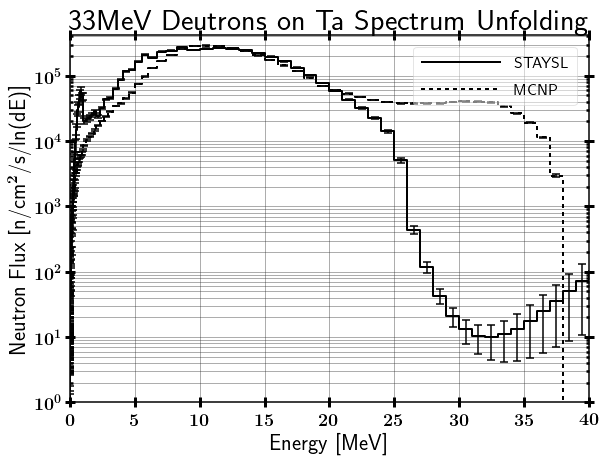

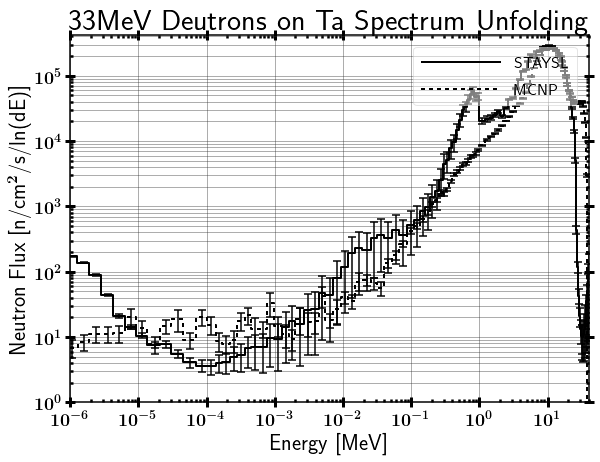

In [14]:
iter = 2

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(mcnpLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

iterAdjHisto[iter].plot(mcnpLethargyHisto, xMin=1E-6, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_log_Itr{:1d}'.format(iter))